# Case-study: use of PIC-SURE API to extract data from the Jackson Heart Study cohort

## INTRO - Install the required libraries

We install the newly created package picsuRe to facilitate the use of the PIC-SURE API

We also set up the JupyterNB environment

In [1]:
library(devtools)

install_github("hms-dbmi/picsuRe", force = TRUE)
library(picsuRe)

from URL https://api.github.com/repos/hms-dbmi/picsuRe/zipball/master
Installing picsuRe
'/opt/conda/lib/R/bin/R' --no-site-file --no-environ --no-save --no-restore  \
  --quiet CMD INSTALL  \
  '/tmp/Rtmp5P7d0F/devtools13994313722c/hms-dbmi-picsuRe-cfdda08'  \
  --library='/opt/conda/lib/R/library' --install-tests 



In [2]:
httr::set_config(httr::config(ssl_verifypeer = 0L, ssl_verifyhost = 0L, ssl_verifystatus  = 0L))
if (!file.exists(Sys.getenv("TAR")))  Sys.setenv(TAR = "/bin/tar")

install_github("kaz-yos/tableone", force = TRUE)
library(tableone)
    
install.packages("reticulate", repos = "http://cran.r-project.org")
library(reticulate)
    
library(ggplot2)
install.packages("ggthemes",repos = "https://cran.cnr.berkeley.edu/")
library(ggthemes)

from URL https://api.github.com/repos/kaz-yos/tableone/zipball/master
Installing tableone
'/opt/conda/lib/R/bin/R' --no-site-file --no-environ --no-save --no-restore  \
  --quiet CMD INSTALL  \
  '/tmp/Rtmp5P7d0F/devtools13996324675c/kaz-yos-tableone-48edcec'  \
  --library='/opt/conda/lib/R/library' --install-tests 

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


## 1. Data extraction
`environment`: The URL of the environment

`key`: To authenticate with PIC-SURE put your key or token in an otherwise empty text file in your JupyterNotebook's top level folder. The key will be read from there so the key does not get seen by anyone except you.

`variables`: A vector with the variables of interest. You can put a variable, or a path, as you want. You can also use the * key if you want to use a wild card. If an argument corresponds to a node, it will return all the variables below the node

In [3]:
env <- "https://topmed-dev.hms.harvard.edu"
key <- as.character(read.table("topmedkey.csv", sep=",")[1,1])

var <- c(Consent_groups = "The Jackson Heart Study - phs000286/00. population/consent_groups",
               Age = "Age (yrs) at baseline clinic visit",
               Gender = "01. Demographics/Gender",
               Diabetes = "Diabetes status (Type I or II)",
               LV_thickness = "M-mode diastolic IV septum thickness in mm",
               Smoking = "*Smoked at least 400 cigarettes",
               Diastolic_BP = "*Diastolic (first BP)")

With the function `picsure`, we build our query, and get the results back from the API. The output is a dataset with the variables of interests. By default, it will return all the patients that have at least one value for a variable.

In [4]:
demo <- picsure(env, key, var, verbose = TRUE)

Key detected, starting a session on https://topmed-dev.hms.harvard.edu
Succesfully started the session on https://topmed-dev.hms.harvard.edu
Next time, try using the token instead of the key. If you want a demo, ask the developpers.
Hi Laura_Versmee thank you for using picsuRe!

Retrieving the selected pathways:
  Using the "find" function of PICSURE

Retrieving all variables associated with: /The Jackson Heart Study - phs000286/00. population/consent_groups
/topmed-i2b2/Demo/The Jackson Heart Study - phs000286/The Jackson Heart Study - phs000286/00. population/consent_groups/DS-FDO-IRB/
/topmed-i2b2/Demo/The Jackson Heart Study - phs000286/The Jackson Heart Study - phs000286/00. population/consent_groups/DS-FDO-IRB-NPU/
/topmed-i2b2/Demo/The Jackson Heart Study - phs000286/The Jackson Heart Study - phs000286/00. population/consent_groups/HMB-IRB/
/topmed-i2b2/Demo/The Jackson Heart Study - phs000286/The Jackson Heart Study - phs000286/00. population/consent_groups/HMB-IRB-NPU/

Retrie

   user  system elapsed 
  1.218   0.035  13.265 

If necessary, you can get a list of all the pathways and variables available by running the `raj()` function. This function takes as argument the environment, the token, and optionally a node where you want to start your list.
It will return a vector with all the pathways available

In [ ]:
list.variables <- raj(env, key, verbose = FALSE)
list.variables2 <- raj(env, key, "The Jackson Heart Study - phs000286")

## 2. Use the data to make statistics
### 2.a. Summary statistics
Let's take a look at the characteristics of our population

In [6]:
catVars <- c("Consent_groups", "Gender", "Diabetes", "Smoking")
vars <- c("Consent_groups", "Gender", "Diabetes", "Smoking", "LV_thickness", "Age", "Diastolic_BP")
paste("We have", nrow(demo), "patients in our population.")
"Table 1: Description of the population from the Jackson Study"
CreateTableOne(vars, data = demo[,-1], factorVars = catVars, strata = c("Gender"), test = FALSE)

[1] "We have 3602 patients in our population."

[1] "Table 1: Description of the population from the Jackson Study"

Warning message:
In min(x, na.rm = TRUE): no non-missing arguments to min; returning InfWarning message:
In min(x, na.rm = TRUE): no non-missing arguments to min; returning InfWarning message:
In min(x, na.rm = TRUE): no non-missing arguments to min; returning InfWarning message:
In max(x, na.rm = TRUE): no non-missing arguments to max; returning -InfWarning message:
In max(x, na.rm = TRUE): no non-missing arguments to max; returning -InfWarning message:
In max(x, na.rm = TRUE): no non-missing arguments to max; returning -InfWarning message:
In StdDiff(variable = var, group = strataVar): Variable has only NA's in at least one stratum. na.rm turned off.Warning message:
In StdDiff(variable = var, group = strataVar): Variable has only NA's in at least one stratum. na.rm turned off.Warning message:
In StdDiff(variable = var, group = strataVar): Variable has only NA's in at least one stratum. na.rm turned off.Warning message:
In is.na(var): is.na() applied to non-(list or vector) of type 'N

                          Stratified by Gender
                                        Female         Male          
  n                         66           2214           1322         
  Consent_groups (%)                                                 
     1                      11 ( 16.7)    300 ( 13.6)    178 ( 13.5) 
     2                       5 (  7.6)    110 (  5.0)     65 (  4.9) 
     3                      34 ( 51.5)   1291 ( 58.3)    806 ( 61.0) 
     4                      16 ( 24.2)    513 ( 23.2)    273 ( 20.7) 
  Gender (%)                                                         
                            66 (100.0)      0 (  0.0)      0 (  0.0) 
     Female                  0 (  0.0)   2214 (100.0)      0 (  0.0) 
     Male                    0 (  0.0)      0 (  0.0)   1322 (100.0) 
  Diabetes (%)                                                       
                            66 (100.0)     47 (  2.1)     28 (  2.1) 
     Absent                  0 (  0.0)   17

### 2.b. Comparison of a categorical variable with a continuous one. 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  20.00   45.00   55.00   54.86   64.00   95.00      66 

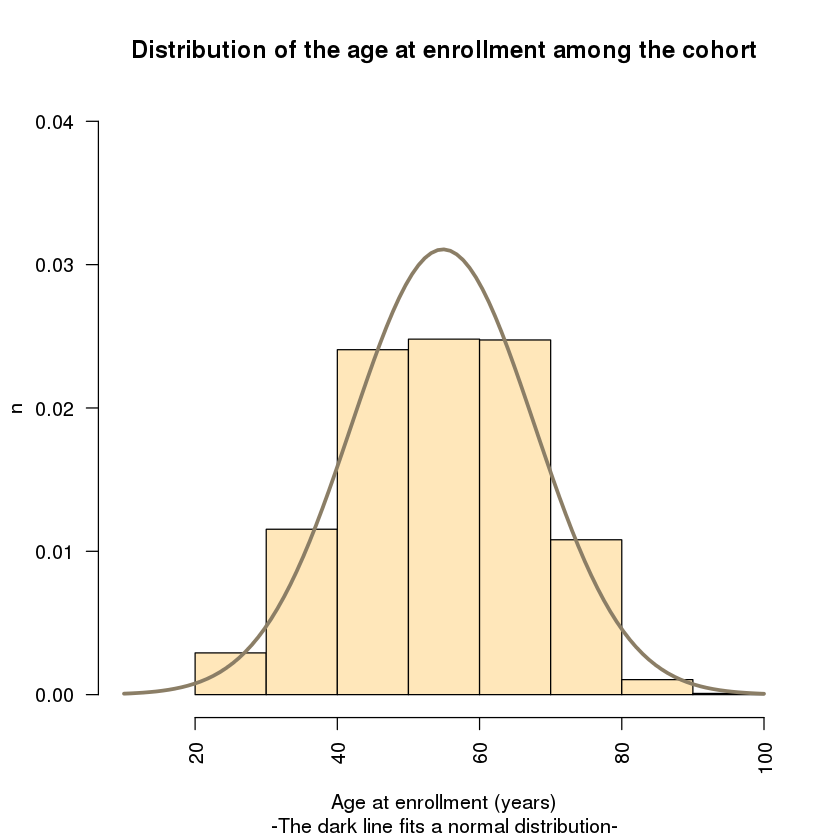

In [7]:
Age <- demo$Age
summary(Age)
hist(Age,
     main="Distribution of the age at enrollment among the cohort",
     sub="-The dark line fits a normal distribution-",
     xlab="Age at enrollment (years)", 
     ylab="n",
     border="black", 
     col="wheat1",
     xlim=c(10,100),
     ylim=c(0,0.04),
     breaks=10,
     las = 2,
     prob = TRUE
    )
m <- mean(Age, na.rm = TRUE)
std <- sqrt(var(Age, na.rm = TRUE))
x <- length(Age)
curve(dnorm(x, mean=m, sd=std), col="wheat4", lwd=3, add=TRUE, yaxt="n")

### 2.c. Comparison of 2 categorical variables. Gender and smokers.

In [8]:
demo <- demo[((demo$Gender == "Male" | demo$Gender == "Female")
            & (demo$Smoking == "Yes" | demo$Smoking == "No")),]
demo <- droplevels(demo)

Smokers <- demo$Smoking
Gender <- demo$Gender

table(Gender, Smokers)
chisq.test(Gender, Smokers)

        Smokers
Gender     No  Yes
  Female 1630  580
  Male    734  586


	Pearson's Chi-squared test with Yates' continuity correction

data:  Gender and Smokers
X-squared = 122.24, df = 1, p-value < 2.2e-16


### 3.b. Statistical analysis
We can now run a t-test in order to compare the Septal thickness diastole between females and males

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  5.500   7.800   8.700   8.855   9.600  17.800    1265 


	Welch Two Sample t-test

data:  LV_thickness by Gender
t = -10.324, df = 1668.8, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.7824201 -0.5325810
sample estimates:
mean in group Female   mean in group Male 
            8.607371             9.264871 


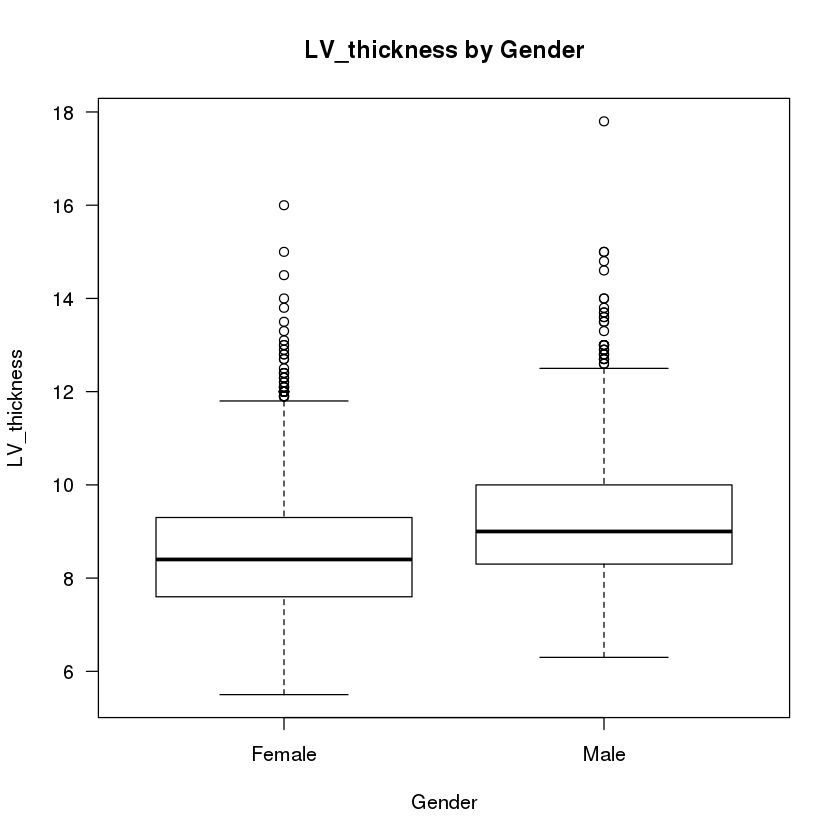

In [9]:
demo2 <- demo[(demo$Gender == "Female" | demo$Gender == "Male"),]

LV_thickness <- demo$LV_thickness
Gender <- demo2$Gender

summary(LV_thickness)
t.test(LV_thickness~Gender)
boxplot(LV_thickness~Gender, main="LV_thickness by Gender", xlab="Gender", ylab="LV_thickness",   las = 1)